# Prediction Of Heart Diseases using Machine Learning

Based on the user's medical attributes, this ML model is able to predict whether or not the person has tendencies of heart diseases.

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Testing

## 1. Problem Definition

Problem Statement : **Given clinical parameters of a patient, can we predict whether the patient has a heart disease or not?**

## 2. Data

Data has been obtained from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3. Evaluation

Optimum accuracy should be above 95% during the prediction.

## 4. Features

Create data dictionary

* age- age in years
* sex- (1 = male; 0 = female)
*   cp- chest pain type
* trestbps- resting blood pressure (in mm Hg on admission to the hospital)
*  chol- serum cholestoral in mg/dl
*  fbs- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg- resting electrocardiographic results
* thalach- maximum heart rate achieved
* exang- exercise induced angina (1 = yes; 0 = no)
* oldpeak- ST depression induced by exercise relative to rest
* slope- the slope of the peak exercise ST segment
* ca- number of major vessels (0-3) colored by flourosopy
* thal- 3 = normal; 6 = fixed defect; 7 = reversable defect
* target- 1 or 0


## 5. Preparing the tools

The following libraries are going to be used for data preparation, analysis and modelling :
* pandas
* matplotlib
* numpy
* scikit-learn
* seaborn

In [122]:
#import these libraries

# exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/navendu-pottekkat/heart-disease-classifier/master/data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration

In [124]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [125]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

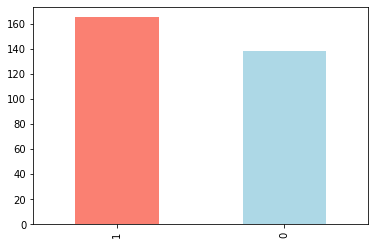

In [126]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [128]:
#check for any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [129]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [130]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

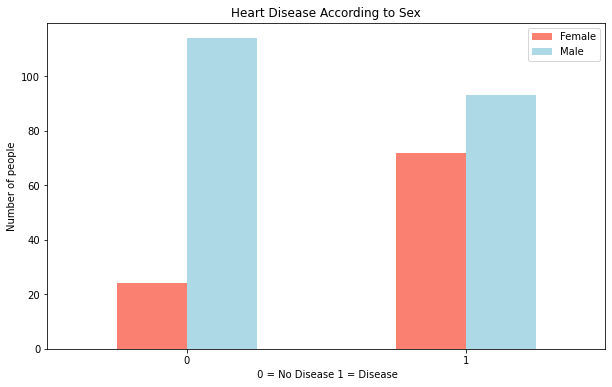

In [131]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,6), color = ['salmon', 'lightblue'])
plt.title('Heart Disease According to Sex');
plt.xlabel(' 0 = No Disease 1 = Disease')
plt.ylabel('Number of people')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0)

## Age v/s Max Heart Rate for Heart Disease

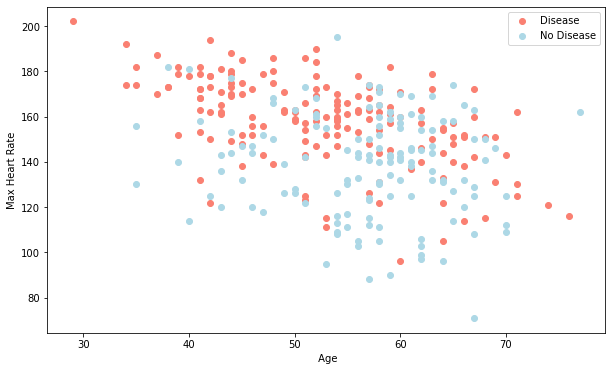

In [132]:
plt.figure(figsize=(10,6))

# scatter with positive disease cases
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = 'salmon')

# scatter with negative disease cases
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = 'lightblue')

plt.xlabel(' Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

Text(0.5, 0, 'Age')

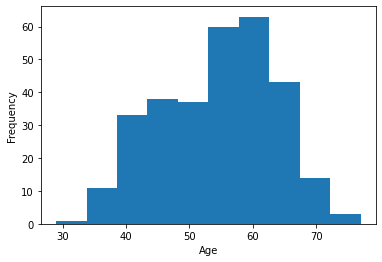

In [133]:
# checking the distribution of the age column
df.age.plot(kind='hist')
plt.xlabel('Age')

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type
* 0 - Typical angina
* 1 - Atypical angina
* 2 - Non-anginal pain
* 3 - Asymptomatic

In [134]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

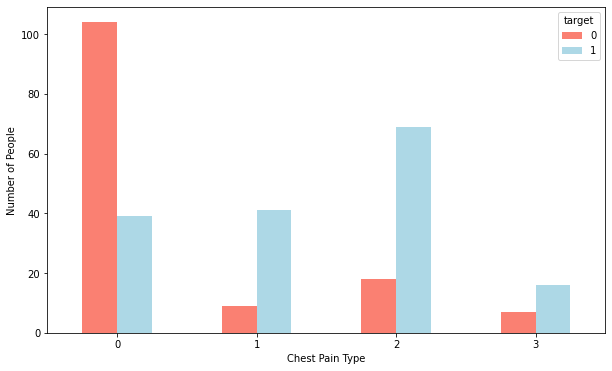

In [135]:
# represeting it visually
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10,6), color = ['salmon','lightblue'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of People')
plt.xticks(rotation = 0)

In [136]:
# make a correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


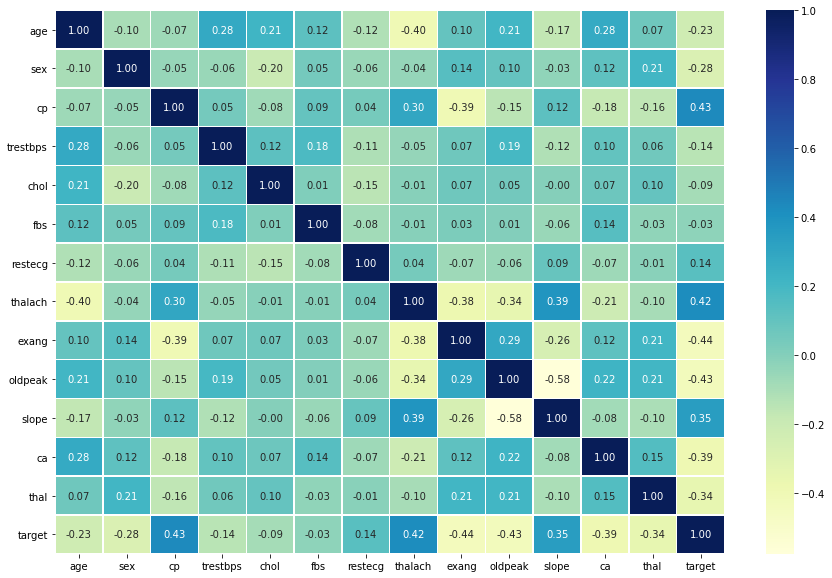

In [137]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");

## 5. Modelling

In [138]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [139]:
# split data into X and y
X = df.drop('target', axis = 1 )
y = df['target']

In [140]:
# split the data into train and test split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [141]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [142]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Let's try for 3 different machine learning models to get the accuracy
* Logistic Regression
* K-Nearest Neighbors Classifier
* Random Forest Classifier

In [143]:
models = {'LogisticRegression' : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "RandomForest" : RandomForestClassifier()}
#function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        #fit the model
        model.fit(X_train, y_train);
        #append the scores of the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [144]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            y_train = y_train,
                            X_test = X_test,
                            y_test = y_test)
model_scores

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

## Model Comparison

In [145]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,LogisticRegression,KNN,RandomForest
Accuracy,0.885246,0.688525,0.836066


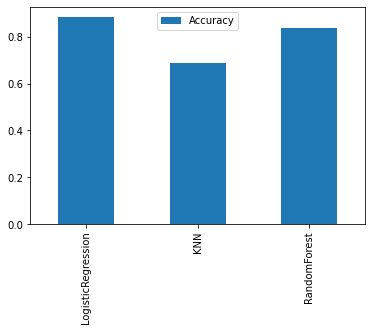

In [146]:
model_compare.T.plot(kind='bar')

Let's check out the following parameters :
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area under the curve(AUC)

## Hyperparameter tuning of KNN by hand

In [147]:
#tuning KNN by hand
train_scores = []
test_scores = []
#create a list of different values for n neighbors
neighbors = range(1,21);
#setup KNN instance
knn = KNeighborsClassifier()
#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [148]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [149]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data : 75.41%


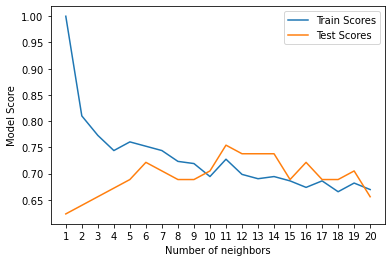

In [150]:
plt.plot(neighbors, train_scores, label = 'Train Scores')
plt.plot(neighbors, test_scores, label = 'Test Scores')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1,21,1))
print(f'Maximum KNN Score on the test data : {max(test_scores)*100:.2f}%')

## Hyperparameter tuning of Random Forest Classifier using RandomisedSearchCV

In [151]:
# create  hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [152]:
# Tune RandomForestClassifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions = rf_grid, 
                           cv = 5, 
                           n_iter = 20, 
                           verbose =  True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [153]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [154]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning of Logistic Regression using GridSearchCV

In [155]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid = log_reg_grid, 
                          cv = 5, 
                          verbose =  True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [156]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [157]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation of the model

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* precision
* Recall
* F1- Score

In [158]:
# made predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

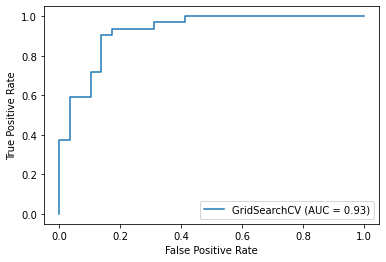

In [159]:
#plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [160]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


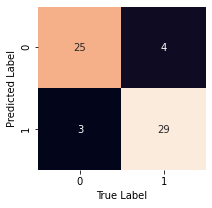

In [161]:
def plt_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plt_conf_mat(y_test, y_preds);

In [162]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Feature Importance
(which features has contributed most to the model?)

In [163]:
# create new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")
clf.fit(X_train, y_train);

In [164]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [165]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

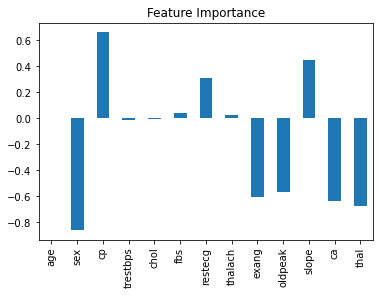

In [166]:
# visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);